In [13]:
import networkx as nx
import matplotlib as plt

Create Graph

In [14]:
G = nx.Graph()
print(G.nodes)

[]


[(0, 0, 0), (1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)]


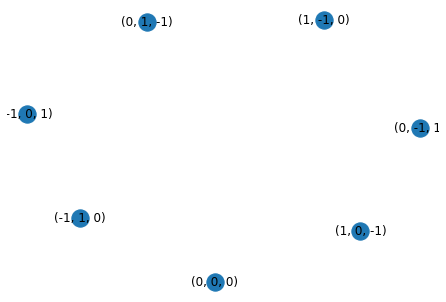

In [15]:
node_list = [(0,0,0), (1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)]
for node in node_list:
    G.add_node(node)
print(G.nodes)
nx.draw_spring(G, with_labels=True)

In [16]:
def node_generation(row, col):
    """Function for generating the correct (and correctly labeled nodes)"""
    node_list = []
    for x in range(row):
        for y in range(col):
            node_list.append((x, y, -(x+y)))
    return node_list


def add_nodes(node_list, graph):
    for node in node_list:
        graph.add_node(node)
    # nx.draw_spring(graph, with_labels=True)
    return graph


def consecutive_positions(node):
    # generate consecutive positions
    inner_ring_vectors = [(1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)] # consecutive vectors
    inner_ring_nodes = []
    for inner_ring_vector in inner_ring_vectors:
        # add each vector to the node
       # print(node, inner_ring_vector)
        consecutive_node = [
            a_i + b_i for a_i, b_i in zip(node, inner_ring_vector)]
       # print(consecutive_node)
        # add it to the list

        inner_ring_nodes.append(tuple(consecutive_node))

    return inner_ring_nodes



def find_consecutive_nodes(node, graph):
    """if consecutive_nodes are in the node list, then add them to list of edges that need to be joined together"""
    edge_list = [] # list of edges that need to be joined

    inner_ring_nodes = consecutive_positions(node) # list of positions consecutive to the nodes
    print(inner_ring_nodes)
    # if consecutive nodes are in the list of nodes in the graph
    for inner_ring_node in inner_ring_nodes:
        if inner_ring_node in graph.nodes:
            edge_list.append(inner_ring_node)#
        else:
            print(f'the node, {inner_ring_node} was not added as it is not in the {graph}')

    return edge_list

def add_edges(edge_list, graph, node):
    """Add edges from edge list to the graph"""
    for edge in edge_list:
        graph.add_edge(node, edge)
    # nx.draw_spring(graph, with_labels=True)
    return graph


In [40]:
def node_generation_v2(row, col):

    def pairwise(iterable): # function
        "s -> (s0, s1), (s2, s3), (s4, s5), ..."
        a = iter(iterable)
        return zip(a, a)

    node_list = []
    # for every 2 rows in the network until you fun out of rows to iterate through:
    for x1, x2 in pairwise(list(range(row))): # for every 2 elements in the list
        print('x1', x1, 'x2', x2)
        for y in list(range(col)): # for every y coordinate
            print('y', y)
            print(x1, y, -(x1+y))
            print(x2, y, -(x2+y))
            node_list.append((x1, y, -(x1+y)))
            node_list.append((x2, y, -(x2+y)))

        # step back in the coordinate system 2
    return node_list

def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return zip(a, a)

# for x, y in pairwise(list(range(10))): # for every 2 elements in the list
#     print(x, y)

node_generation_v2(5, 5)

x1 0 x2 1
y 0
0 0 0
1 0 -1
y 1
0 1 -1
1 1 -2
y 2
0 2 -2
1 2 -3
y 3
0 3 -3
1 3 -4
y 4
0 4 -4
1 4 -5
x1 2 x2 3
y 0
2 0 -2
3 0 -3
y 1
2 1 -3
3 1 -4
y 2
2 2 -4
3 2 -5
y 3
2 3 -5
3 3 -6
y 4
2 4 -6
3 4 -7


[(0, 0, 0),
 (1, 0, -1),
 (0, 1, -1),
 (1, 1, -2),
 (0, 2, -2),
 (1, 2, -3),
 (0, 3, -3),
 (1, 3, -4),
 (0, 4, -4),
 (1, 4, -5),
 (2, 0, -2),
 (3, 0, -3),
 (2, 1, -3),
 (3, 1, -4),
 (2, 2, -4),
 (3, 2, -5),
 (2, 3, -5),
 (3, 3, -6),
 (2, 4, -6),
 (3, 4, -7)]

In [29]:
print(list(range(0, -10, -1)))

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


x1 0 x2 1
y 0
0 0 0
1 0 -1
y -1
0 -1 1
1 -1 0
y -2
0 -2 2
1 -2 1
y -3
0 -3 3
1 -3 2
y -4
0 -4 4
1 -4 3
x1 2 x2 3
y 0
2 0 -2
3 0 -3
y -1
2 -1 -1
3 -1 -2
y -2
2 -2 0
3 -2 -1
y -3
2 -3 1
3 -3 0
y -4
2 -4 2
3 -4 1
[(1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)]
the node, (-1, 0, 1) was not added as it is not in the Graph with 20 nodes and 0 edges
the node, (-1, 1, 0) was not added as it is not in the Graph with 20 nodes and 0 edges
the node, (0, 1, -1) was not added as it is not in the Graph with 20 nodes and 0 edges
[(2, 0, -2), (2, -1, -1), (1, -1, 0), (0, 0, 0), (0, 1, -1), (1, 1, -2)]
the node, (0, 1, -1) was not added as it is not in the Graph with 20 nodes and 3 edges
the node, (1, 1, -2) was not added as it is not in the Graph with 20 nodes and 3 edges
[(1, -1, 0), (1, -2, 1), (0, -2, 2), (-1, -1, 2), (-1, 0, 1), (0, 0, 0)]
the node, (-1, -1, 2) was not added as it is not in the Graph with 20 nodes and 6 edges
the node, (-1, 0, 1) was not added as it is not 

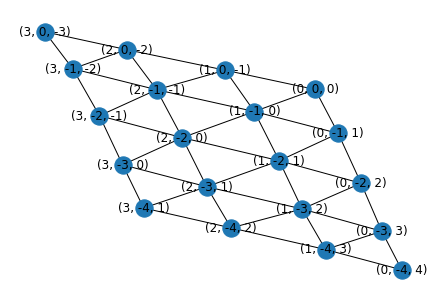

In [39]:
I = nx.Graph() # make graph
def make_network(row, col, graph):
    # create coordinates
    node_list = node_generation_v2(row, col)

    # add nodes to list
    add_nodes(node_list, graph)

    for node in graph.nodes:
        # for each node
        edge_list = find_consecutive_nodes(node, graph) # find the set of nodes that are consecutive and in the graph
        add_edges(edge_list, graph, node)

    nx.draw_spring(graph, with_labels=True) # draw graph


make_network(5, 5, I)

In [115]:
    H = nx.Graph()
node = (0,1,-1)


node_list = node_generation(3, 3)
print('node list', node_list)
add_nodes(node_list, H)


edge_list = find_consecutive_nodes(node, H)
print(edge_list)

add_edges(edge_list, H, node)

# for node in node_list:
#     edge_list = find_consecutive_nodes(node, H)
#     print(edge_list)
#     add_edges(edge_list, H, node)
# consecutive_positions((0,2,-2))

TypeError: node_generation() missing 1 required positional argument: 'offset'

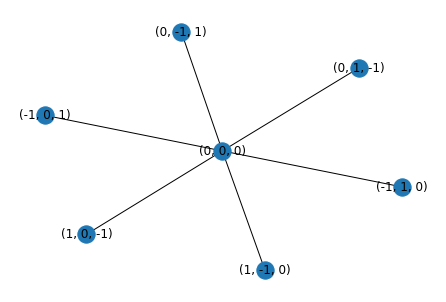

In [17]:
# edges function connects every node to the correspoinding node on its own inner ring (function for getting inner ring stuff?)

for node in node_list[1:]:
    G.add_edge(node_list[0], node)
nx.draw_spring(G, with_labels=True)